In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated().any()

True

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(302, 14)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_calib,y_train,y_calib=train_test_split(df.drop(columns='target'),df['target'],test_size=0.2,random_state=42)

In [10]:
X_train.shape

(241, 13)

In [11]:
y_calib.shape

(61,)

In [12]:
from sklearn.calibration import CalibratedClassifierCV

In [13]:
from sklearn.calibration import calibration_curve

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
base_classifier=GaussianNB()

In [16]:
base_classifier.fit(X_train,y_train)

GaussianNB()

In [17]:
calibrated_classifier=CalibratedClassifierCV(base_classifier,cv='prefit')
calibrated_classifier.fit(X_calib,y_calib)

CalibratedClassifierCV(cv='prefit', estimator=GaussianNB())

In [18]:
calibrated_classifier.predict(df.drop(columns='target').head(1).values[0].reshape(1,-1))

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [20]:
calibration_curve(np.array(df['target']),np.array(calibrated_classifier.predict((df.drop(columns='target')))))

(array([0.14503817, 0.84795322]), array([0., 1.]))

Without using SCIKIT-LEARN

In [21]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\heart.csv")

In [22]:
df = df.sample(frac=1).reset_index(drop=True)

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
1,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
2,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
3,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
4,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1021,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
1022,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
1023,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1


In [24]:
df=df.drop_duplicates()

In [26]:
df.shape

(302, 14)

In [27]:
X=df.drop(columns='target')

In [28]:
y=df['target']

In [29]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,66,1,0,160,228,0,0,138,0,2.3,2,0,1
1,43,1,2,130,315,0,1,162,0,1.9,2,1,2
2,67,1,0,120,237,0,1,71,0,1.0,1,0,2
3,60,1,0,130,206,0,0,132,1,2.4,1,2,3
4,58,0,0,170,225,1,0,146,1,2.8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,57,1,2,150,126,1,1,173,0,0.2,2,1,3
736,41,1,1,110,235,0,1,153,0,0.0,2,0,2
829,54,0,2,110,214,0,1,158,0,1.6,1,0,2
834,60,1,0,130,253,0,1,144,1,1.4,2,1,3


In [31]:
X_train=X.iloc[0:150,]
y_train=y.iloc[0:150,]

In [32]:
X_train.shape

(150, 13)

In [33]:
y_train.shape

(150,)

In [35]:
y_train.value_counts()

0    76
1    74
Name: target, dtype: int64

In [37]:
X_valid=X.iloc[150:250,]
y_valid=y.iloc[150:250,]

In [38]:
X_valid.shape

(100, 13)

In [39]:
y_valid.value_counts()

1    59
0    41
Name: target, dtype: int64

In [40]:
X_test=X.iloc[250:,]
y_test=y.iloc[250:,]

In [41]:
X_test.shape

(52, 13)

In [42]:
y_test.value_counts()

1    31
0    21
Name: target, dtype: int64

In [44]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [45]:
models={'svc':SVC(probability=True),'rf':RandomForestClassifier(),'nb':GaussianNB()}

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19092\2539007952.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_prob_train)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19092\2539007952.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_prob_test)
C:\Users\ASUS\AppData\Local\Temp\ipyk

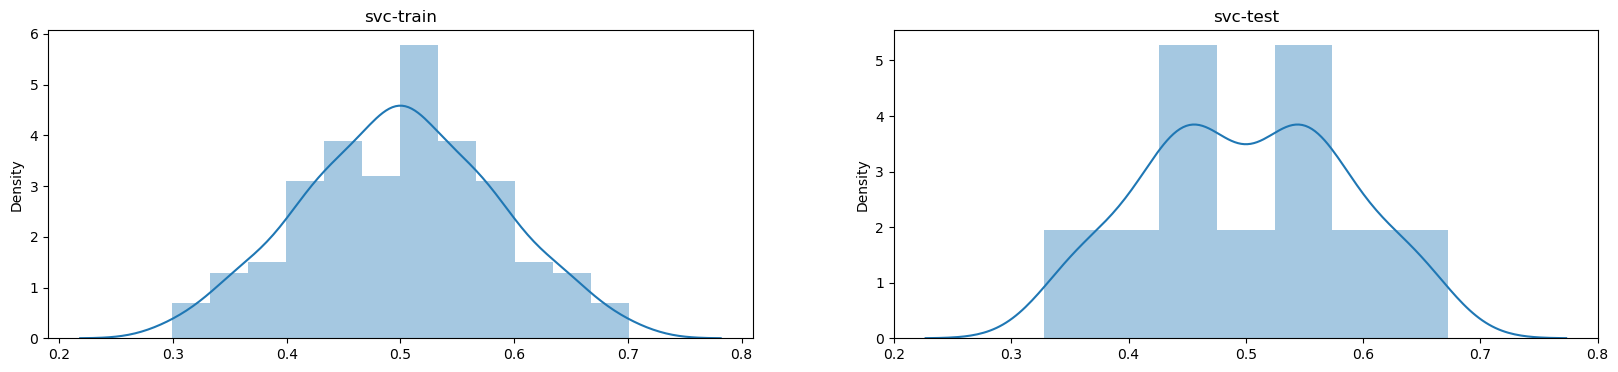

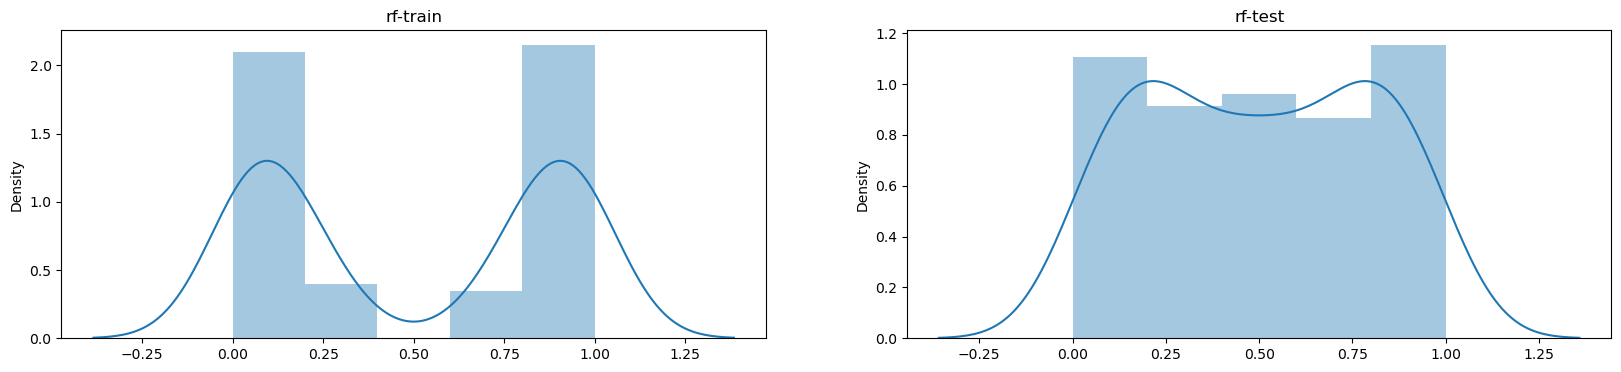

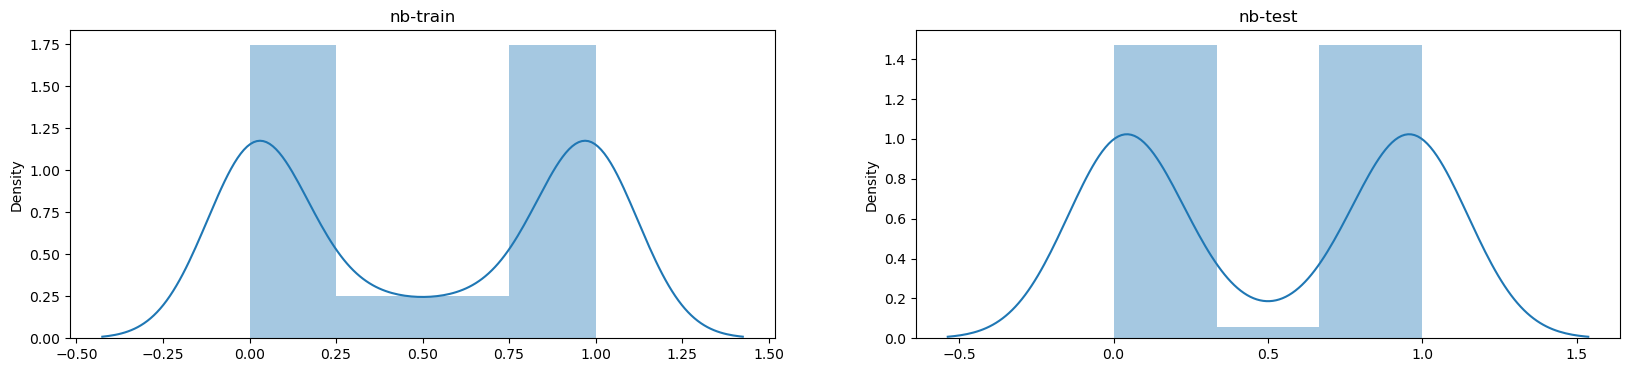

In [48]:
model_prob={}
for model_str, model in models.items():
    clf=model
    clf.fit(X_train,y_train)
    
    pred_prob_train=clf.predict_proba(X_train)
    pred_prob_valid=clf.predict_proba(X_valid)
    pred_prob_test=clf.predict_proba(X_test)
    
    model_prob[model_str]={'train':pred_prob_train,'validation':pred_prob_valid,'test':pred_prob_test}
    
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.distplot(pred_prob_train)
    plt.title(f'{model_str}-train')
    
    plt.subplot(1,2,2)
    sns.distplot(pred_prob_test)
    plt.title(f'{model_str}-test')
    

In [49]:
model_prob

{'svc': {'train': array([[0.53063916, 0.46936084],
         [0.53552913, 0.46447087],
         [0.69960183, 0.30039817],
         [0.50853586, 0.49146414],
         [0.5       , 0.5       ],
         [0.5       , 0.5       ],
         [0.48097562, 0.51902438],
         [0.51805175, 0.48194825],
         [0.49424375, 0.50575625],
         [0.47466373, 0.52533627],
         [0.5       , 0.5       ],
         [0.58098027, 0.41901973],
         [0.43297297, 0.56702703],
         [0.46161221, 0.53838779],
         [0.42605445, 0.57394555],
         [0.42900338, 0.57099662],
         [0.43855428, 0.56144572],
         [0.47676239, 0.52323761],
         [0.5       , 0.5       ],
         [0.54650551, 0.45349449],
         [0.40911957, 0.59088043],
         [0.60232613, 0.39767387],
         [0.62776133, 0.37223867],
         [0.58446896, 0.41553104],
         [0.35403636, 0.64596364],
         [0.5       , 0.5       ],
         [0.4424593 , 0.5575407 ],
         [0.4830571 , 0.5169429 ],
    

G:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
G:\anaconda\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


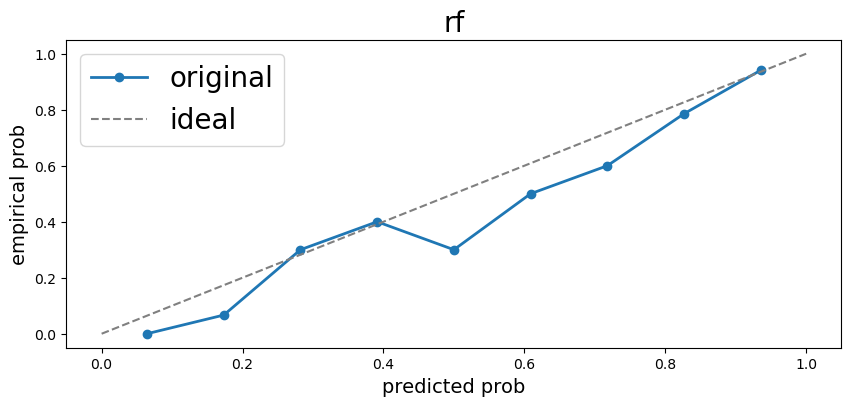

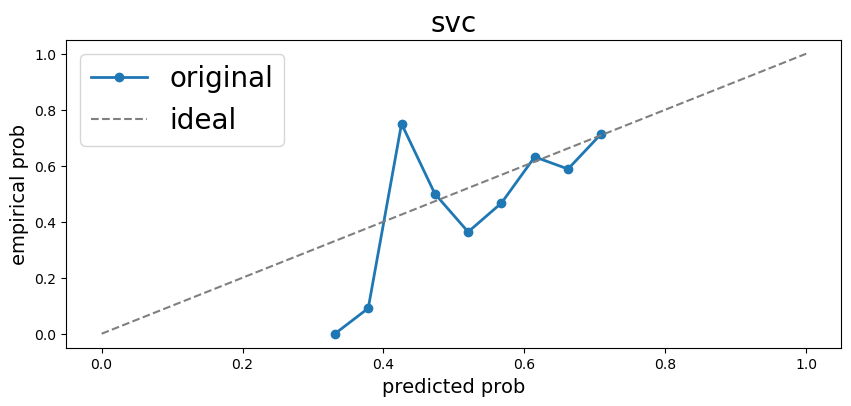

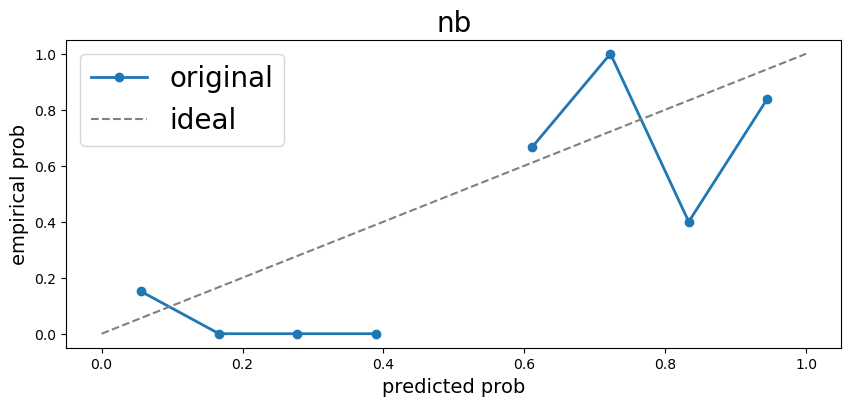

In [58]:
for model_str, pred_prob_dict in model_to_probs.items():
    pred_probs = pred_prob_dict['test']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(test_y[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'ideal'], fontsize=20)

G:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
G:\anaconda\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


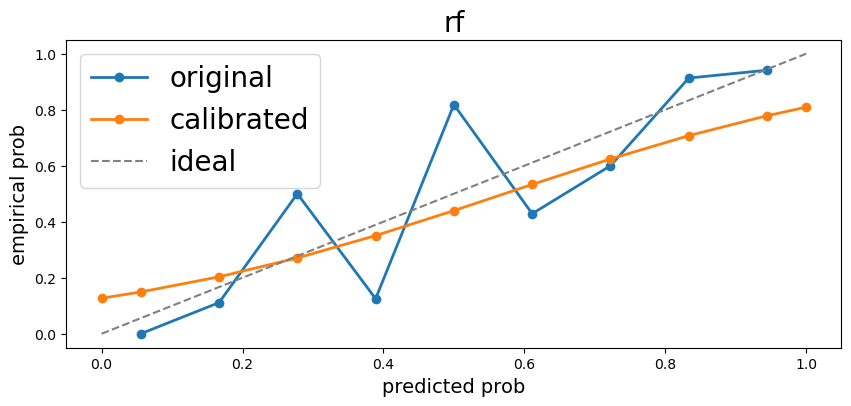

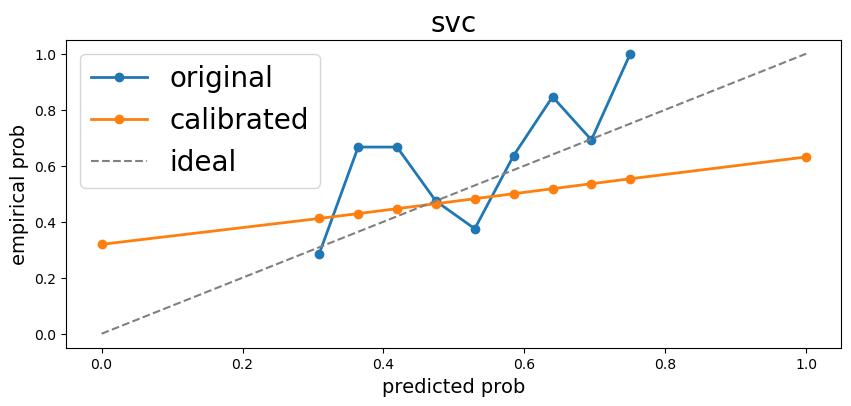

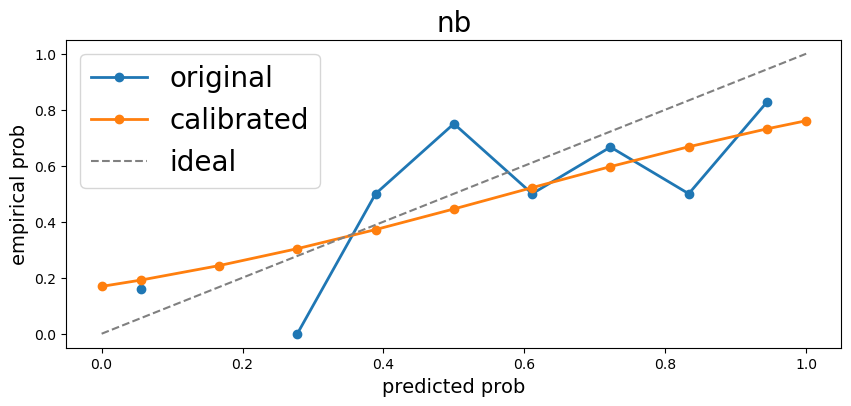

In [59]:
model_str_to_calibrator = {}

for model_str, pred_prob_dict in model_to_probs.items():
    
    lr_model = LogisticRegression()
    lr_model.fit(pred_prob_dict['test'].reshape(-1,1), test_y)
    
    pred_probs = pred_prob_dict['valid']

    pred_probs_space = np.linspace(pred_probs.min(), pred_probs.max(), 10)

    empirical_probs = []
    pred_probs_midpoints = []

    for i in range(len(pred_probs_space)-1):
        empirical_probs.append(np.mean(valid_y[(pred_probs > pred_probs_space[i]) & (pred_probs < pred_probs_space[i+1])]))
        pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

    calibrated_probs = lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1]
    
    plt.figure(figsize=(10,4))
    plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
    plt.title(f"{model_str}", fontsize=20)
    plt.xlabel('predicted prob', fontsize=14)
    plt.ylabel('empirical prob', fontsize=14)
    
    plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')
    
    plt.plot([0,1],[0,1],linestyle='--',color='gray')
    
    plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)
    
    model_str_to_calibrator[model_str] = lr_model